In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TCS_stock_history.csv')

In [3]:
print(df.head())

         Date       Open       High        Low      Close  Volume  Dividends  \
0  2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1  2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2  2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3  2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4  2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB
None


In [6]:
# Step 3: Data Preprocessing
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.fillna(method='ffill', inplace=True)

In [7]:
print("\nNull Values Check:\n", df.isnull().sum())
print("\nClose Price Statistics:\n", df['Close'].describe())


Null Values Check:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Close Price Statistics:
 count    4463.000000
mean      866.537398
std       829.611313
min        26.377609
25%       188.594620
50%       529.713257
75%      1154.784851
max      3954.550049
Name: Close, dtype: float64


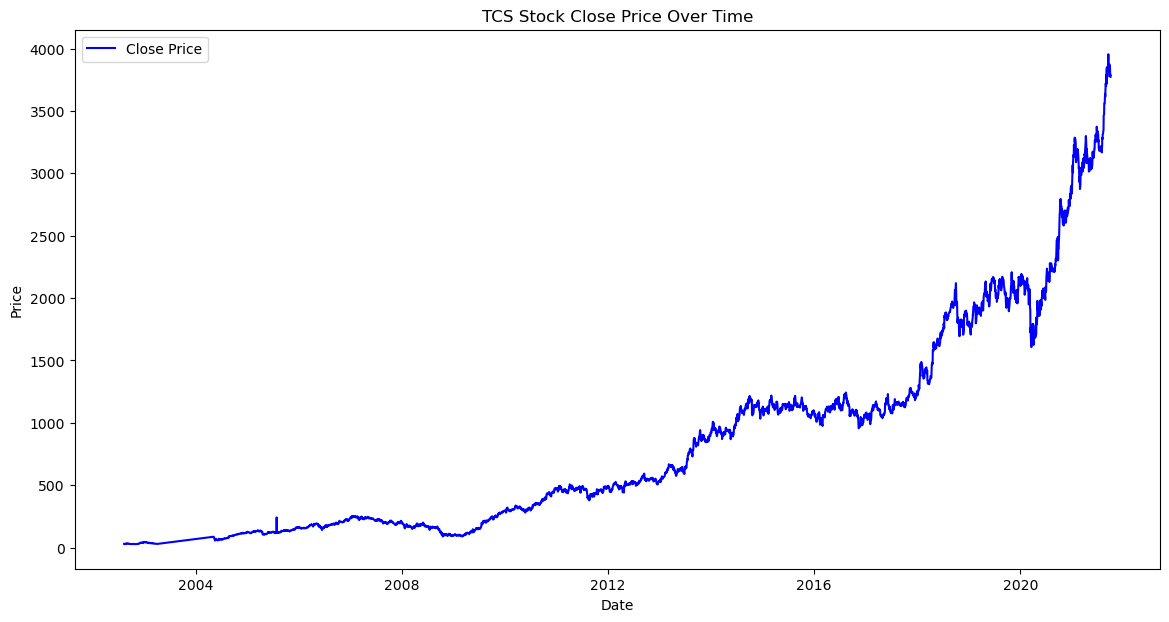

In [8]:
# Step 4: Exploratory Data Analysis
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('TCS Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [9]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

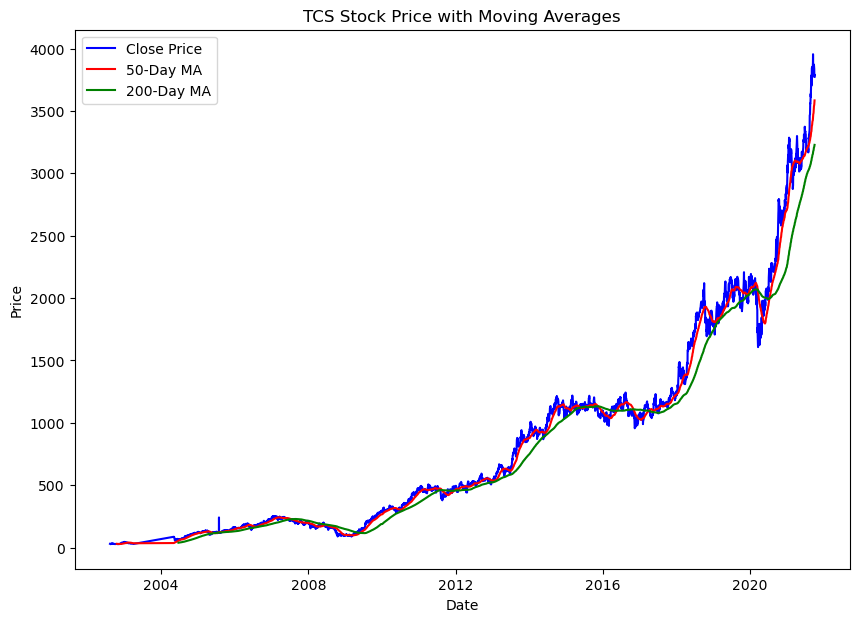

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='red')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='green')
plt.title('TCS Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

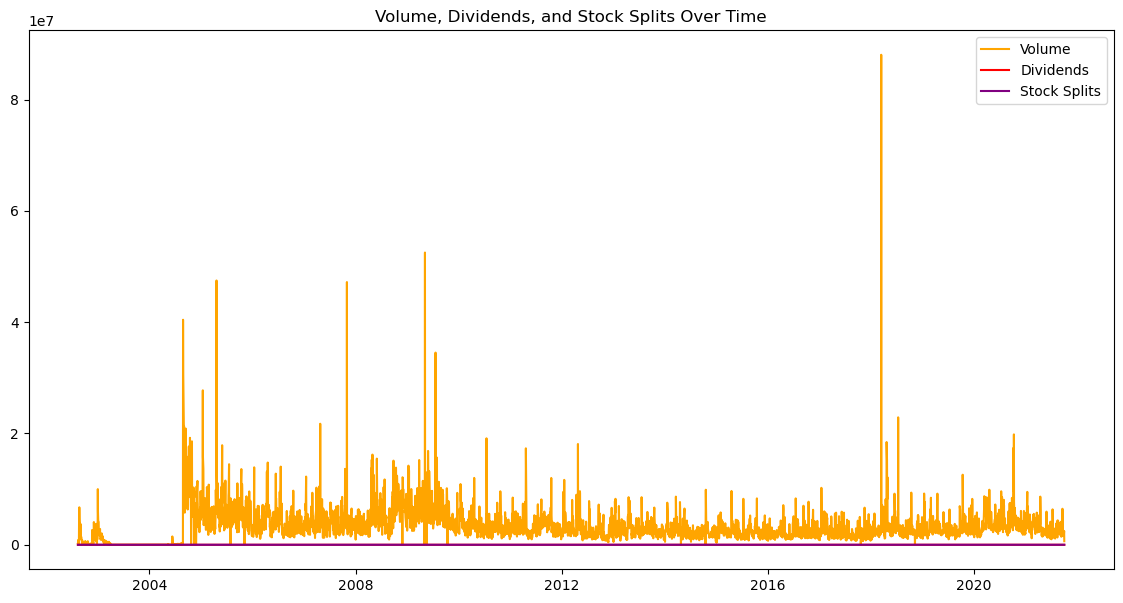

In [11]:
# Volume, Dividends, Stock Splits
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='red')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='purple')
plt.title('Volume, Dividends, and Stock Splits Over Time')
plt.legend()
plt.show()

In [12]:
# Step 5: Feature Engineering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)


In [13]:
# Step 6: Linear Regression Model
X = df[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
print("\n--- Linear Regression Model Performance ---")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))



--- Linear Regression Model Performance ---
Mean Squared Error: 39.04992998525289
R-Squared Score: 0.9999438356582192


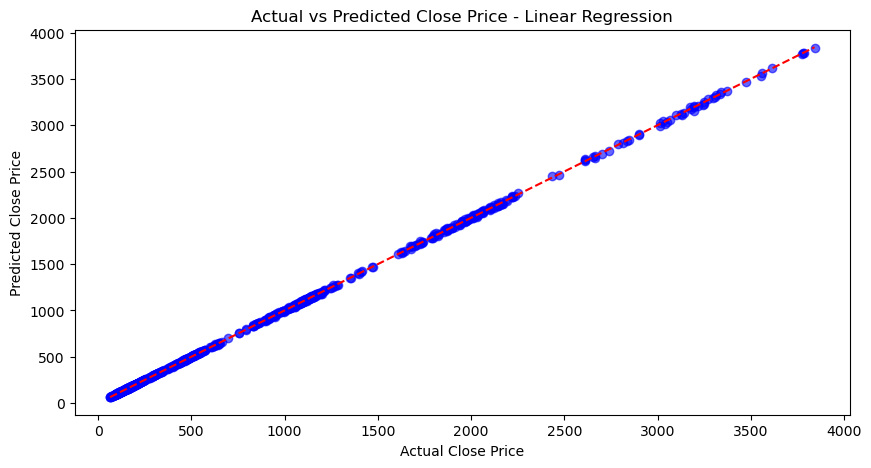

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price - Linear Regression')
plt.show()

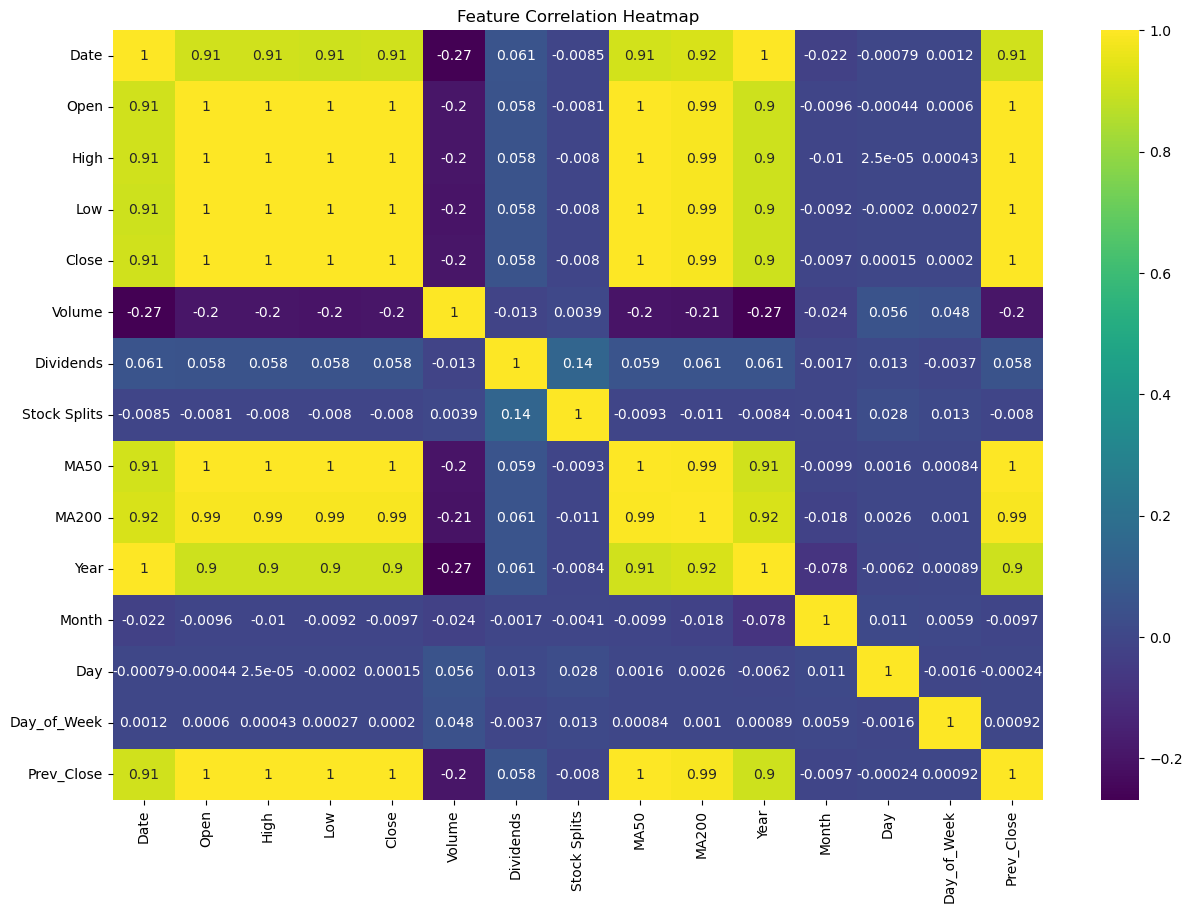

In [16]:
# Step 8: Additional Insights - Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

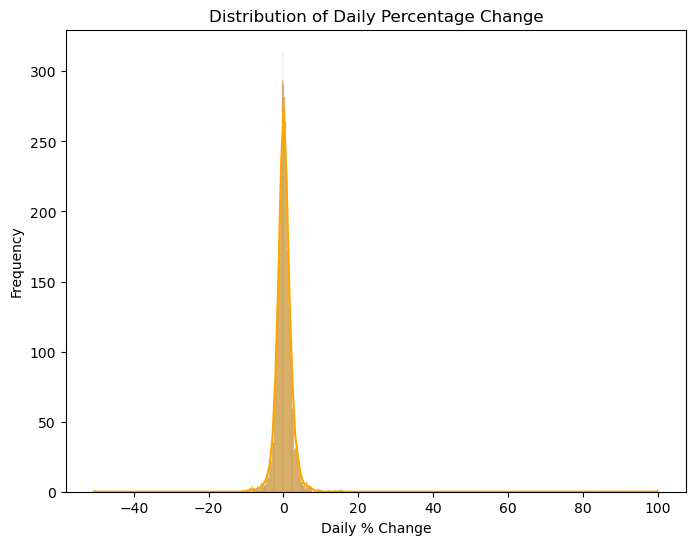

In [17]:
# Step 9: Daily Percentage Change Distribution
df['Daily_Change'] = df['Close'].pct_change() * 100
plt.figure(figsize=(8,6))
sns.histplot(df['Daily_Change'].dropna(), kde=True, color='orange')
plt.title('Distribution of Daily Percentage Change')
plt.xlabel('Daily % Change')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Step 10: Moving Average Crossover Strategy
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

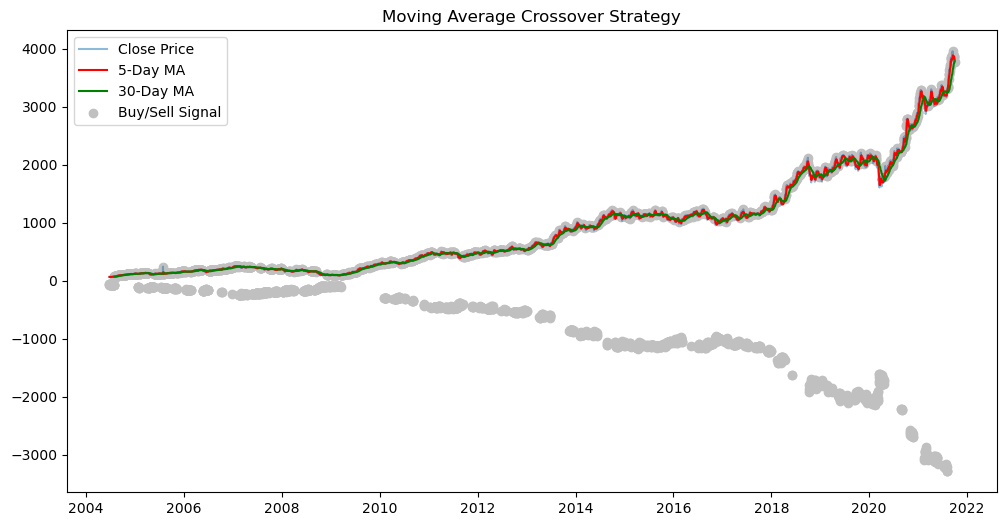

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['Short_MA'], label='5-Day MA', color='red')
plt.plot(df['Date'], df['Long_MA'], label='30-Day MA', color='green')
plt.scatter(df['Date'], df['Close'] * df['Signal'], label='Buy/Sell Signal', marker='o', color='silver')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

In [20]:
print(df['Close'].describe())


count    4264.000000
mean      905.194542
std       828.765807
min        62.681683
25%       206.532475
50%       575.650360
75%      1166.532288
max      3954.550049
Name: Close, dtype: float64


In [21]:
print("Actual Close Price Range:", y_test.min(), "-", y_test.max())
print("Predicted Close Price Range:", y_pred.min(), "-", y_pred.max())

Actual Close Price Range: 63.66688919067383 - 3842.050048828125
Predicted Close Price Range: 62.87871963151792 - 3829.09348618387


In [22]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 3.8579699841529265


In [24]:
correlation_matrix = df[["Open", "High", "Low", "Close"]].corr()
print(correlation_matrix)


           Open      High       Low     Close
Open   1.000000  0.999883  0.999887  0.999776
High   0.999883  1.000000  0.999860  0.999910
Low    0.999887  0.999860  1.000000  0.999896
Close  0.999776  0.999910  0.999896  1.000000
